In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import csgraph
from scipy.sparse import csr_matrix
from util_2 import *

# 2.2 Communication entre espions (optimisation combinatoire)

__1) Modélisation du problème et démarche de résolution__

On pose $G = [\![1,n]\!]$ l'ensemble des espions et $E=\bigcup_{i\in G}\{(i,s), s\in S_{i}\}$ les voies de communications entre les espions.

L'objectif étant de minimiser la probabilité d'interception, on souhaite trouver un sous-arbre $E'\subset E$ minimisant $\prod_{(i,j)\in E'} p_{ij}$, ce qui revient à minmiser $\sum_{(i,j)\in E'}\log p_{ij}$.

En pondérant les arrêtes de notre graphe par la fonction symétrique d'interception $w=(i,j)\in E\longmapsto \log p_{ij}$, le problème revient alors à résoudre un problème d'arbre recouvrant minimum sur $(G,E,w)$,

$$ \text{i.e.}\quad (\mathcal{P}) : \text{Trouver } (G,E') \enspace\text{  tq  }\enspace \begin{matrix}\sum_{e'\in E'}w(e') \text{ est min}\\ 
(G,E') \text{ connexe}
\end{matrix}$$

__2) Résolution__

Chargement des données

In [2]:
filePath = "data/ProbaInterception.txt"
proba_interception = []

# read and split lines of txt file
with open(filePath, "rb") as f:
    rows = f.readlines()
    for row in rows:
        proba_interception += [row.split()]

# cast to float and set to 0 nan values
# no conflict as none of the probability is actually set to 0
proba_interception = np.array(proba_interception)
proba_interception = proba_interception.astype(float)
proba_interception[np.isnan(proba_interception)]=0

print(proba_interception.shape)

(15, 15)


/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

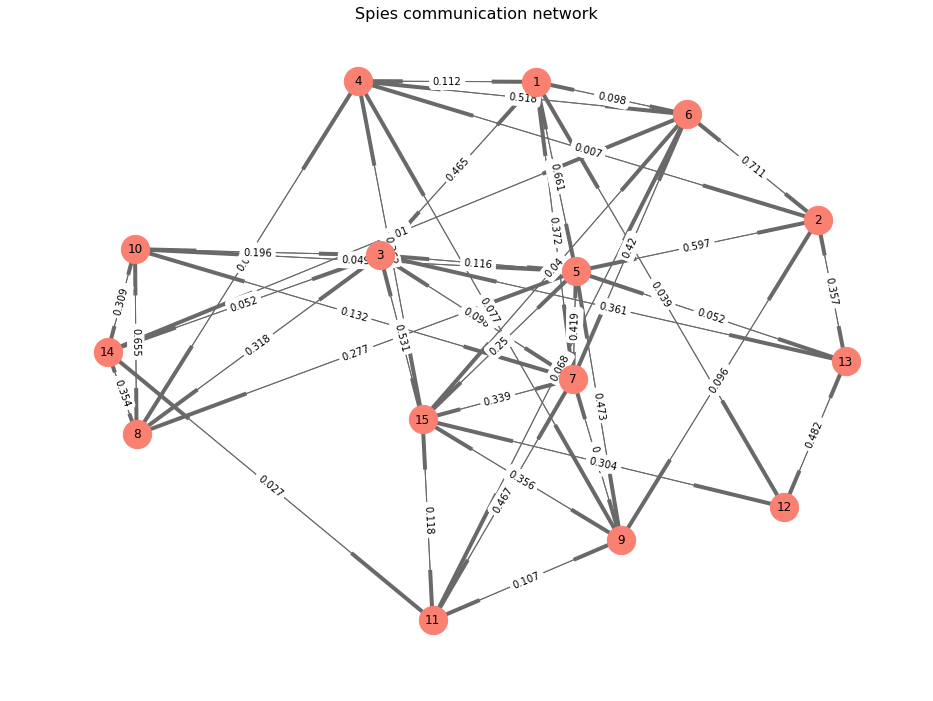

In [11]:
plot_graph(proba_interception)
plt.title("Spies communication network", size=16)
plt.show()

Solve minimum spanning tree problem

In [4]:
graph = csr_matrix(proba_interception.copy())
Tcsr = csgraph.minimum_spanning_tree(graph)
minimum_spanning_graph = Tcsr.toarray()

Set edges to highlight

In [14]:
to_highlight = []
for i, row in enumerate(minimum_spanning_graph):
        spy_i = str(i+1)
        reachable_spies = np.where(row>0)[0]
        for j in reachable_spies:
            spy_j = str(j+1)
            to_highlight += [(spy_i, spy_j)]
            to_highlight += [(spy_j, spy_i)]

/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

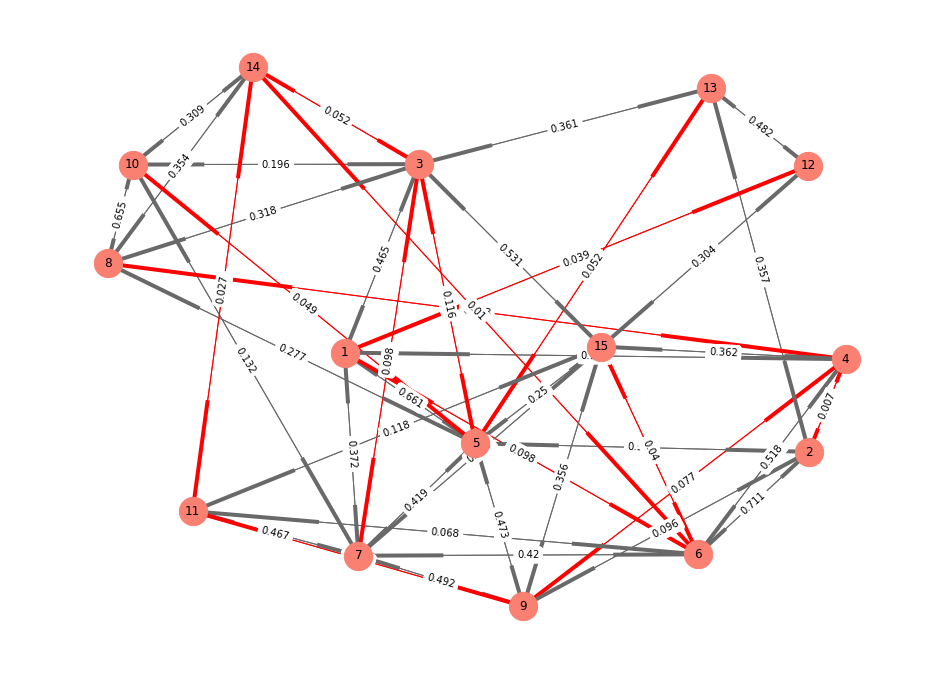

In [15]:
plot_graph(proba_interception, to_highlight=to_highlight)
plt.show()

/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

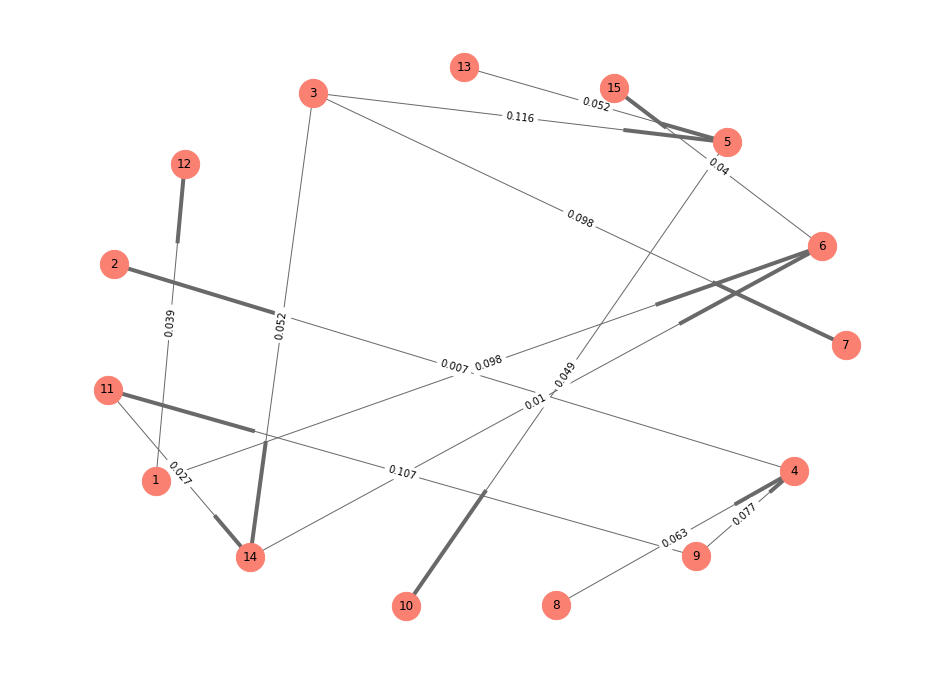

In [17]:
plot_graph(minimum_spanning_graph)
plt.show()